In [ ]:
!pip install python-binance

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from binance.client import Client
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import time
import os
from IPython.display import clear_output
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import time
import os
import math
from IPython.display import clear_output
from keras.models import Sequential
from keras.layers import Dense, Dropout, CuDNNLSTM, Conv1D
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import tensorflow as tf
from binance.client import Client
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import cufflinks as cf
import seaborn as sns
%matplotlib inline


In [ ]:
dir_link=input('Enter Link of directory')
file_name='/binance_data.csv'
compl_link=dir_link+file_name
compl_link

Enter Link of directory/content/drive/MyDrive/Colab Notebooks


'/content/drive/MyDrive/Colab Notebooks/binance_data.csv'

In [ ]:

interval_chosen = []

def data():
    API_KEY = 'cmC20L6OdOe6nfS4iD0T3aIYYbGh53G9nsz1kSO4pd5JsVtVbsycpvzxIwN89AEN'
    API_SECRET = 'JjyurQGV0hcbsEhsdUQoaoaeA85kw33xRrEJywhOJfI6ZNUvT42RMkQK1ed59gyh'
    #API_KEY = 'FiehiL4oASF4FDsR5oAUfBqhdOjR4vwfwQltHbX4ucdr78XY6nA8bKsVorwfMMpt'
    #API_SECRET = 'k4pkBSFEjupQN63PYYBDl3mgKrLAMEopKCcy8YcLusi0mBrxyxyCLbQB12awL3QC'
    # API_KEY = 'aTrEpYSztGNxooC07JI0mEfFJUud6jg2yOJkhMt9xC5IQBFbq19n5SApaG0eeHoS'
    # API_SECRET ='c8AoWE0caEmyGuQuLQSKFPLdcD1UN0T9MBDcuRbWPYT7nlk308XWmU0YzcUwvSwq'

    client = Client(API_KEY, API_SECRET)
    whole_data = []

    all_coins = ["BNBUSDT", "ETHUSDT", "ADAUSDT", "DOTUSDT", "BTCUSDT", "FTMUSDT", "DOGEUSDT", "LINKUSDT", "SUSHIUSDT", "SOLUSDT",
                 "IOSTUSDT", "LTCUSDT", "XRPUSDT", "SXPUSDT", "MATICUSDT", "BCHUSDT"]




    td=timedelta(-10)
    time_now = datetime.now()
    start1 = time_now + td
    start = start1.strftime('%Y-%m-%d- %H:%M:%S')



    Current_Date = datetime.today()

    end=Current_Date.strftime ('%Y-%m-%d- %H:%M:%S')






    # data_of_coin = input('Enter the name of coin along with USDT such BNBUSDT')
    data_of_coin='BTCUSDT'

    index_of_coin = all_coins.index(data_of_coin)


    print(index_of_coin)
    coin = all_coins[index_of_coin]
    # print(coin)

    # interval = input('Enter 5m  for the INTERVAL of 5MINUTE \n , 15m for the INTERVAL of 15MINUTE, \n'
    #                  '3 for the INTERVAL of 30MINUTE \n, 4for the INTERVAL of 1 HOUR, \n'
    #                  ' 5 for the INTERVAL of 4HOUR \n, 8h for the INTERVAL of 8 HOUR \n')
    interval='5m'

    interval_chosen.append(interval)

    dictionary = {'1m': Client.KLINE_INTERVAL_1MINUTE,'5m': Client.KLINE_INTERVAL_5MINUTE, '15m': Client.KLINE_INTERVAL_15MINUTE,
                  '30m': Client.KLINE_INTERVAL_30MINUTE, '1h': Client.KLINE_INTERVAL_1HOUR,
                  '4h': Client.KLINE_INTERVAL_4HOUR, '8h': Client.KLINE_INTERVAL_8HOUR}
    # print('start',start, type(start), 'end', end, type(end) )
    for runner in range(0, 1):

        name = []
        klines = client.get_historical_klines(coin, dictionary[interval], start, end)


        # getting name of coin.
        for i in klines:
            name.append(coin)

        df = pd.DataFrame(klines)  # data of coin is prepared.
        df['Coin_Name'] = name

        whole_data.append(df)
        # print(df)

    merging_data = pd.concat(whole_data, axis=0)
    #print(merging_data)

    m_data = merging_data.drop(11, axis=1)
    global N_data
    N_data = m_data.rename(columns={0: 'Open time', 1: 'Open', 2: 'High', 3: 'Low', 4: 'Close', 5: 'Volume',
                                          6: 'Close Time', 7: 'Qoute Asset Volume', 8: 'No of Trades', 9: 'Taker buy',
                                          10: 'Taker buy quote asset volume', 'Coin_Name': 'Coin_Name'})

    o_t_c = N_data['Open time'] / 1000
    c_t_c = N_data['Close Time'] / 1000

    o_t_list = []
    for timer in o_t_c:
        timestamp = datetime.fromtimestamp(timer)
        o_t_value = timestamp.strftime('%Y-%m-%d %H:%M:%S')
        o_t_list.append(o_t_value)
    N_data['Open time'] = o_t_list

    c_t_list = []
    for timer in c_t_c:
        timestamp = datetime.fromtimestamp(timer)
        c_t_value = timestamp.strftime('%Y-%m-%d %H:%M:%S')
        c_t_list.append(c_t_value)
    N_data['Close Time'] = c_t_list
    N_data.to_csv(compl_link)
    return N_data




# print('Data File Created')



In [ ]:
def predic_fun():
  global df
  df=pd.read_csv(compl_link, index_col='Open time', usecols=[ 'Open time', 'Open', 'High', 'Low', 'Close', 'Volume',
        'Qoute Asset Volume', 'No of Trades', 'Taker buy',
        'Taker buy quote asset volume'])
  df=df[:-1]
  global test_df,x_train, y_train
  test_df=df
  test_df['Close']=test_df['Close'].shift(-1)
  data1=test_df.iloc[:-1]
  x_train=data1.drop('Close', axis=1)
  # y_train=pd.Series(data1['Close'])
  y_train=data1['Close']
  clf=RandomForestRegressor()
  clf.fit(x_train,y_train)
  # prediction=clf.predict(test_df.drop('Close',axis=1).iloc[-1:])


  # row=-3
  usecols=[ 'Open', 'High', 'Low', 'Volume','Qoute Asset Volume', 'No of Trades', 'Taker buy','Taker buy quote asset volume']
  global predict_df1
  predict_df=[]
  for i in usecols:
  #     print(i)
      try:
          model = ARIMA(df[i][:], order=(2,2,5))
          model_fit = model.fit()
          
          predict_df.append((i,model_fit.forecast()[0][0]))
      except:
          predict_df.append((i,df[i][-1]))
          # print(i,df[i][row-1])
  # global predict_df1
  predict_df1=pd.DataFrame(predict_df).T
  predict_df1.columns=predict_df1.loc[0]
  predict_df1.iloc[1:]
  prediction=clf.predict(predict_df1.iloc[1:])

  return prediction
# predic_fun()

In [ ]:
win_str=0
max_lose_str=0
lose_str=0
max_win_str=0
# check_list=[]

def values_plot():
  global check_list
  closed_=test_df['Close'].iloc[-3:][0] #real closed value
  open=test_df['Open'].iloc[-1:][0]     #real open value
  pre_open=predict_df1['Open'].iloc[1]      #predicted open value
  
  open_list.append((test_df.index[-1],open))
  closed_list.append((test_df.index[-3],closed_))
  prediction=predic_fun()
  prediction[0]
  prediction_list.append((time_for_pred(),prediction[0]))
  
  predicted_open_list.append((time_for_open_pred(),pre_open))
  # check_list.append((time_for_pred(),prediction[0],pre_open))
  # print(time_for_pred(),'predicted close',prediction[0],'predicted open',pre_open)

  
  
  
  
  
  time_=test_df['Open'].iloc[-1:].index[0]
  global open_df , prediction_df, closed_df,predicted_open_df,predicted_open_df_indx
  open_df=pd.DataFrame(open_list[1:])
  prediction_df=pd.DataFrame(prediction_list[:-1])
  closed_df=pd.DataFrame(closed_list)

  predicted_open_df=pd.DataFrame(predicted_open_list)

  prediction_str=pd.DataFrame(predicted_open_list)
  #matrix
  predicted_open_df_indx=prediction_str
  predicted_open_df_indx.index=prediction_str[0]

  streak()

  figure, ax=plt.subplots(4,figsize=(20,20))

  
  # subplot1.set(title='Open Value at '+time_+' Prediction for next 10 mins')
  ax[0].scatter(time_for_pred(),prediction[0], label='Predicted Closed Value')
  ax[0].scatter(time_for_pred(),pre_open, label='predicted Open Value')
  

  # x = np.arange(len(prediction_df[0]))
  # width = 0.35

  
  
  # subplot2.plot(open_list[1:], label='Real Open Value Graph')
  # subplot2.plot(prediction_list[:-1], label='Predicted Closed Values Graph')
  try:
    # print(open)
    ax[2].bar(prediction_df[0], prediction_df[1], width=0.8, label='Predicted Closed Value' )
    ax[2].bar(open_df[0], open_df[1], width=0.4, label='Real Open Value')

    

    ax[2].set_xlim(0,15)
    ax[2].set_ylim(open-15,open+5)
    ax[2].set_xticks(prediction_df[0])
    ax[2].set_xticklabels(prediction_df[0], rotation=90)
    
  except:
    pass
  try:
    ax[3].bar(closed_df[0], closed_df[1], width=0.8, label='Real Closed Value', color='red' )
    ax[3].bar(open_df[0], open_df[1], width=0.4, label='Real  Open Value', color='orange')

    

    ax[3].set_xlim(0,15)
    ax[3].set_ylim(open-15,open+5)
    ax[3].set_xticks(closed_df[0])
    ax[3].set_xticklabels(closed_df[0], rotation=90)
  except:
    pass


  try:
    # print(open)
    ax[1].bar(prediction_df[0], prediction_df[1], width=0.8, label='Predicted Closed Value' )
    ax[1].bar(predicted_open_df[0], predicted_open_df[1], width=0.4, label='predicted Open Value')

    

    ax[1].set_xlim(0,15)
    ax[1].set_ylim(open-15,open+5)
    ax[1].set_xticks(prediction_df[0])
    ax[1].set_xticklabels(prediction_df[0], rotation=90)
    
  except:
    pass

  ax[0].legend()
  ax[1].legend()
  ax[2].legend()
  ax[3].legend()



In [ ]:
max_lose_str=0
total_trade=0
win_per=0
win_str=0
lose_str=0
max_win_str=0
def streak():
 
 # list_for_streak.append((time_for_open_pred(),pre_open))

  global max_lose_str, win_str, max_lose_str, lose_str, max_win_str, total_trade, win_per
  
  
  try:
    
    
    
      

    
  

    if test_df.loc[prediction_df.iloc[-3][0]][0] < test_df.loc[prediction_df.iloc[-3][0]][3] and predicted_open_df_indx.loc[prediction_df.iloc[-3][0]][1] < prediction_df.iloc[-3][1]:
      total_trade=total_trade+1
      print('Total trade :', total_trade)
      
      
      lose_str=0
      win_str=win_str+1
      win_per=win_per+1
      if max_win_str < win_str:
        max_win_str=win_str       
        print('Winning Streak :', max_win_str)
        print('Losing Streak :', max_lose_str)
      else:
        print('Winning Streak :', max_win_str)
        print('Losing Streak :', max_lose_str)

    elif test_df.loc[prediction_df.iloc[-3][0]][0] > test_df.loc[prediction_df.iloc[-3][0]][3] and predicted_open_df_indx.loc[prediction_df.iloc[-3][0]][1] > prediction_df.iloc[-3][1]:
      total_trade=total_trade+1
      print('Total trade :', total_trade)
      lose_str=0
      win_str=win_str+1
      win_per=win_per+1
      # print('Winning Streak :', win_str)
      if max_win_str < win_str:
        max_win_str=win_str

        print('Winning Streak :', max_win_str)
        print('Losing Streak :', max_lose_str)
      else:
        print('Winning Streak :', max_win_str)
        print('Losing Streak :', max_lose_str)
      

    else:
      total_trade=total_trade+1
      print('Total trade :', total_trade)


      win_str=0
      lose_str=lose_str+1
      if max_lose_str < lose_str:
        max_lose_str=lose_str
        print('Losing Streak :', max_lose_str)
        print('Winning Streak :', max_win_str)
      else:
        print('Winning Streak :', max_win_str)
        print('Losing Streak :', max_lose_str)

    
    print('Total Wins', win_per )
    print('Win Percentage :', (win_per/total_trade)*100)


  except:
    pass



In [ ]:
def all_fun():
  data().to_csv(compl_link)
  predic_fun()
  #values_plot()

all_fun()
data().to_csv(compl_link)

4
4


In [ ]:
df.tail()

,Open,High,Low,Close,Volume,Qoute Asset Volume,No of Trades,Taker buy,Taker buy quote asset volume
Open time,,,,,,,,,
2021-09-26 17:50:00,43107.64,43180.00,43091.68,43145.00,100.86551,4.349957e+06,2901,55.21623,2.381167e+06
2021-09-26 17:55:00,43131.41,43186.15,43120.00,43200.11,45.81573,1.977439e+06,1867,23.61352,1.019201e+06
2021-09-26 18:00:00,43145.00,43207.14,43136.64,43193.00,65.24035,2.817177e+06,2317,43.66585,1.885634e+06
2021-09-26 18:05:00,43198.56,43263.05,43190.77,43177.00,55.27192,2.389203e+06,2409,28.67009,1.239338e+06
2021-09-26 18:10:00,43193.00,43210.39,43169.24,NaN,45.66022,1.971949e+06,1985,19.50042,8.421708e+05


In [ ]:
dataset= df

In [ ]:

dataset = pd.concat([
    dataset.iloc[:,0],
    dataset.iloc[:, 1:len(dataset.columns)].astype('float')], axis = 1)

dataset.dtypes

Open                            float64
High                            float64
Low                             float64
Close                           float64
Volume                          float64
Qoute Asset Volume              float64
No of Trades                    float64
Taker buy                       float64
Taker buy quote asset volume    float64
dtype: object

In [ ]:
cols = list([ 'Open time', 'Open', 'High', 'Low', 'Close', 'Volume',
        'Qoute Asset Volume', 'No of Trades', 'Taker buy',
        'Taker buy quote asset volume'])

y_target = 'Close'
 
n_time_steps = 24

dataset_datelist = list(dataset.index)
print('Training set shape == {}'.format(dataset.shape))
print('All timestamps == {}'.format(len(dataset_datelist)))
print('Featured selected: {}'.format(cols))
print('Featured target selected: {}'.format(y_target))
print('Number of time steps selected: {}'.format(n_time_steps))


Training set shape == (2879, 9)
All timestamps == 2879
Featured selected: ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Qoute Asset Volume', 'No of Trades', 'Taker buy', 'Taker buy quote asset volume']
Featured target selected: Close
Number of time steps selected: 24


In [ ]:
train_split = 0.8
Data = dataset.values
train_data_size = math.ceil(len(Data)*train_split)
test_data_size = len(dataset) - train_data_size
print('train size == {}.'.format(train_data_size))
print('test size == {}.'.format(test_data_size))

train, test = dataset[0:train_data_size], dataset[train_data_size:len(dataset)]
print('train shape == {}.'.format(train.shape))
print('test shape == {}.'.format(test.shape))



print(train)

train size == 2304.
test size == 575.
train shape == (2304, 9).
test shape == (575, 9).
                         Open  ...  Taker buy quote asset volume
Open time                      ...                              
2021-09-16 18:00:00  47397.43  ...                  8.389640e+06
2021-09-16 18:05:00  47563.07  ...                  2.798995e+06
2021-09-16 18:10:00  47489.44  ...                  2.687692e+06
2021-09-16 18:15:00  47470.01  ...                  4.682231e+06
2021-09-16 18:20:00  47327.33  ...                  8.254459e+06
...                       ...  ...                           ...
2021-09-24 17:35:00  41873.81  ...                  2.633456e+06
2021-09-24 17:40:00  41896.13  ...                  1.765425e+06
2021-09-24 17:45:00  41891.97  ...                  2.949745e+06
2021-09-24 17:50:00  41950.17  ...                  2.448255e+06
2021-09-24 17:55:00  41917.70  ...                  1.751520e+06

[2304 rows x 9 columns]


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
training_scaled_data = scaler.fit_transform(train)
print('training scaled data shape == {}.'.format(training_scaled_data.shape))
look_back_train_data = train.tail(n_time_steps)
testing_data = look_back_train_data.append(test)
scaler_test = StandardScaler()
testing_scaled_data = scaler_test.fit_transform(testing_data)
scaler_test_predict = StandardScaler()
scaler_test_predict.fit_transform(testing_data.iloc[:, 0:1])
print('testing scaled data shape == {}.'.format(testing_scaled_data.shape))


training scaled data shape == (2304, 9).
testing scaled data shape == (599, 9).


In [ ]:

from numpy import *
def split_sequences_multivariate_output(sequences, n_steps):

  X, y = list(), list()
  for i in range(len(sequences)):
      end_ix = i + n_steps
      if end_ix > len(sequences)-1:
          break
      seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
      X.append(seq_x)
      y.append(seq_y)
  return array(X), array(y)
# convert into input/output
X_train, y_train = split_sequences_multivariate_output(training_scaled_data, n_time_steps)
X_test, y_test = split_sequences_multivariate_output(testing_scaled_data, n_time_steps)
print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))
print('X_test shape == {}.'.format(X_test.shape))
print('y_test shape == {}.'.format(y_test.shape))

X_train shape == (2280, 24, 9).
y_train shape == (2280, 9).
X_test shape == (575, 24, 9).
y_test shape == (575, 9).


In [ ]:
def train_keras_model(X_train, y_train, X_test, y_test, epochs, batch_size, shuffle=False):
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import LSTM, Dropout, Dense
# Initializing the Neural Network based on LSTM
  model = Sequential()  
  model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(Dropout(0.25))
  model.add(LSTM(units=50))
  model.add(Dropout(0.25))
  model.add(Dense(units=X_train.shape[2], activation='linear'))
  model.compile(optimizer='adam',loss='mean_squared_error')
  
  history = model.fit(X_train, y_train, shuffle=shuffle, validation_data=(X_test, y_test), epochs=epochs, verbose=2, batch_size=batch_size).history
  
  return history, model

In [ ]:

history, model = train_keras_model(X_train, y_train, X_test, y_test, epochs=200, batch_size=256, shuffle=False)

Epoch 1/200
9/9 - 5s - loss: 0.8696 - val_loss: nan
Epoch 2/200
9/9 - 1s - loss: 0.6143 - val_loss: nan
Epoch 3/200
9/9 - 1s - loss: 0.5443 - val_loss: nan
Epoch 4/200
9/9 - 1s - loss: 0.5098 - val_loss: nan
Epoch 5/200
9/9 - 1s - loss: 0.4846 - val_loss: nan
Epoch 6/200
9/9 - 1s - loss: 0.4665 - val_loss: nan
Epoch 7/200
9/9 - 1s - loss: 0.4485 - val_loss: nan
Epoch 8/200
9/9 - 1s - loss: 0.4307 - val_loss: nan
Epoch 9/200
9/9 - 1s - loss: 0.4263 - val_loss: nan
Epoch 10/200
9/9 - 1s - loss: 0.4116 - val_loss: nan
Epoch 11/200
9/9 - 1s - loss: 0.3985 - val_loss: nan
Epoch 12/200
9/9 - 1s - loss: 0.3914 - val_loss: nan
Epoch 13/200
9/9 - 1s - loss: 0.3872 - val_loss: nan
Epoch 14/200
9/9 - 1s - loss: 0.3736 - val_loss: nan
Epoch 15/200
9/9 - 1s - loss: 0.3731 - val_loss: nan
Epoch 16/200
9/9 - 1s - loss: 0.3755 - val_loss: nan
Epoch 17/200
9/9 - 1s - loss: 0.3680 - val_loss: nan
Epoch 18/200
9/9 - 1s - loss: 0.3572 - val_loss: nan
Epoch 19/200
9/9 - 1s - loss: 0.3558 - val_loss: nan
Ep

In [ ]:
# Performing predictions
predictions_test = model.predict(X_test)

y_pred_test = scaler_test_predict.inverse_transform(np.array(predictions_test)[:,0])
y_actual_test = scaler_test_predict.inverse_transform(np.array(y_test)[:,0])

In [ ]:
y_test_serie = pd.DataFrame(y_actual_test, columns=[y_target]).set_index(testing_data[n_time_steps:].index)
y_pred_serie = pd.DataFrame(y_pred_test, columns=[y_target]).set_index(testing_data[n_time_steps:].index)

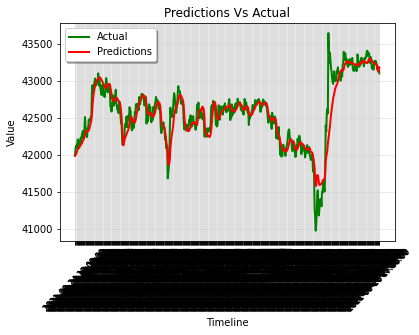

In [ ]:
import matplotlib.pyplot as plt


plt.plot(y_test_serie.index, y_test_serie[y_target], color='green', linewidth=2, label='Actual')
plt.plot(y_pred_serie.index, y_pred_serie[y_target], color='red', linewidth=2, label='Predictions')
plt.grid(which='major', color='#cccccc', alpha=0.5)
plt.legend(shadow=True)
plt.title('Predictions Vs Actual')
plt.xlabel('Timeline', fontsize=10)
plt.ylabel('Value', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()


In [ ]:
dataset.tail()

In [ ]:
print("Next predicted close price: ", (y_pred_test)[0])

Next predicted close price:  41997.477


In [ ]:
#(dataset.index).values[-1]
chosen_interval = "".join(interval_chosen)
num_interval = "". join(filter(str.isdigit, chosen_interval))


In [ ]:
num_interval

'55'

In [ ]:
def time_for_pred():

  #taking the time of last avaiable values
  dt_str = (dataset.index).values[-1]
  #converting string to datetime format
  dt_obj = datetime.strptime(dt_str, '%Y-%m-%d %H:%M:%S')
  # print(dt_obj)

  #adding minutes of predicted value
  dt_obj=dt_obj+timedelta(minutes=int(num_interval))
  #converting to string
  dt_obj=dt_obj.strftime ('%Y-%m-%d %H:%M:%S')
  # dt_obj=datetime.strptime(dt_obj, '%Y-%m-%d %H:%M:%S')
  return dt_obj

In [ ]:
time_for_pred()

'2021-09-26 16:55:00'

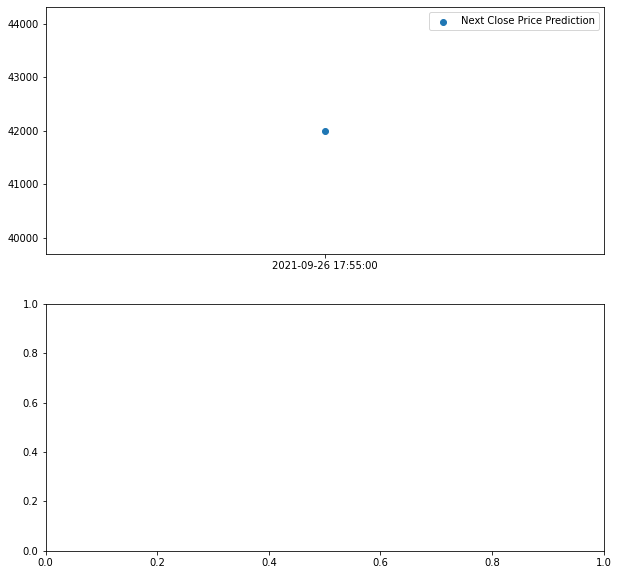

In [ ]:
figure, ax=plt.subplots(2,figsize=(10,10))
  
ax[0].scatter(time_for_pred(),(y_pred_test)[0], label='Next Close Price Prediction')
ax[0].legend()

In [ ]:
print("Next predicted close price: ", (y_pred_test)[0])

Next predicted close price:  41997.477
